In [4]:
import pandas as pd
import pytz
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.load_local_data import load_data

In [6]:
path = os.getcwd()
print("Current Directory", path)
 

parent_directory = os.path.dirname(path)
print("Parent Directory", parent_directory)

data_directory = parent_directory + '\data'
print("Data Directory", data_directory)

Current Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP\notebooks
Parent Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP
Data Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP\data


In [7]:
local_path = data_directory + '\Horcon-etiquetado_con_1_etiqueta.csv'
df = load_data(local_path)
df.head()

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2013-02-03 10:00:00-03:00,981.5,17.81,257,1
2013-02-03 11:00:00-03:00,871.1,17.86,9,1
2013-02-03 12:00:00-03:00,870.7,17.80,9,1
2013-02-03 13:00:00-03:00,1025.5,17.71,256,1
2013-02-03 14:00:00-03:00,870.3,17.84,9,1


In [8]:
time_window = df.loc['15-08-2015':'15-01-2017']

In [9]:
time_window.sort_index(inplace=True)

<AxesSubplot:xlabel='Date_Time'>

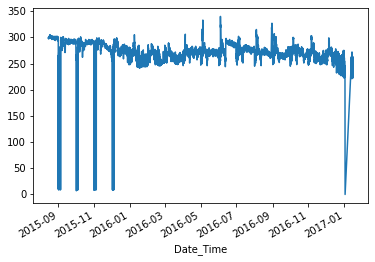

In [10]:
time_window['EC [µs/cm]'].plot()

In [11]:
import matplotlib.pyplot as plt

In [12]:
a  = time_window.loc[time_window['etiqueta conjunta'] == 1] #anomaly

In [13]:
time_window.head()

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2015-08-15 00:00:00-03:00,1251.8,15.16,299,0
2015-08-15 01:00:00-03:00,1296.3,15.14,300,0
2015-08-15 02:00:00-03:00,1286.1,15.05,299,0
2015-08-15 03:00:00-03:00,1353.5,15.02,299,0
2015-08-15 04:00:00-03:00,1353.7,14.93,299,0


In [14]:
a.head()

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2015-08-30 21:00:00-03:00,1380.2,14.96,296,1
2015-08-30 22:00:00-03:00,1220.1,14.85,295,1
2015-08-30 23:00:00-03:00,1135.7,14.98,296,1
2015-08-31 00:00:00-03:00,1101.2,15.14,297,1
2015-08-31 01:00:00-03:00,1314.0,15.19,300,1


In [15]:
import plotly.graph_objects as go

figg = go.Figure()

figg.add_trace(go.Scatter(x=time_window.index, y=time_window['Pression [cm H2O]'],
                    mode='lines',
                    name='operación normal',
                    line_color='cadetblue'))
figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))
                                        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg.update_layout(title='Presión [cm H2O]',
                    yaxis_title='Presión [cm H2O]',
                    xaxis_title='Fecha'
)

# st.plotly_chart(figg, use_container_width=True)
figg.show()

# t = datas.loc[datas['Etiqueta T'] == 1] #anomaly

figg2 = go.Figure()

figg2.add_trace(go.Scatter(x=time_window.index, y=time_window['Temperatura [°C]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkolivegreen'))
figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg2.update_layout(title='Temperatura [°C]',
                    yaxis_title='Temperatura [°C]',
                    xaxis_title='Fecha'
)

figg2.show()
# st.plotly_chart(figg2, use_container_width=True)

# e = datas.loc[datas['Etiqueta EC'] == 1] #anomaly
figg3 = go.Figure()

figg3.add_trace(go.Scatter(x=time_window.index, y=time_window['EC [µs/cm]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkgoldenrod'))
figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))                     
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg3.update_layout(title='EC [µs/cm]',
                    yaxis_title='EC [µs/cm]',
                    xaxis_title='Fecha'
)


# st.plotly_chart(figg3, use_container_width=True)



In [16]:
time_window.index

DatetimeIndex(['2015-08-15 00:00:00-03:00', '2015-08-15 01:00:00-03:00',
               '2015-08-15 02:00:00-03:00', '2015-08-15 03:00:00-03:00',
               '2015-08-15 04:00:00-03:00', '2015-08-15 05:00:00-03:00',
               '2015-08-15 06:00:00-03:00', '2015-08-15 07:00:00-03:00',
               '2015-08-15 08:00:00-03:00', '2015-08-15 09:00:00-03:00',
               ...
               '2017-01-15 14:00:00-03:00', '2017-01-15 15:00:00-03:00',
               '2017-01-15 16:00:00-03:00', '2017-01-15 17:00:00-03:00',
               '2017-01-15 18:00:00-03:00', '2017-01-15 19:00:00-03:00',
               '2017-01-15 20:00:00-03:00', '2017-01-15 21:00:00-03:00',
               '2017-01-15 22:00:00-03:00', '2017-01-15 23:00:00-03:00'],
              dtype='datetime64[ns, Chile/Continental]', name='Date_Time', length=12240, freq=None)

# Separación datos

Se entrena con los datos hasta el 30 de septiembre y se utiliza el conjunto de test desde el 1 de octubre en adelante.

In [39]:
train = time_window.loc[:'2016-09-30']

# mask = (df['date'] > '2016-09-1') & (df['date'] <= '2000-6-10')

test = time_window.loc['2016-10-01':]

In [40]:
test

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2016-10-01 00:00:00-03:00,1341.5,16.60,269,0
2016-10-01 01:00:00-03:00,1307.8,16.63,278,0
2016-10-01 02:00:00-03:00,1328.0,16.61,272,0
2016-10-01 03:00:00-03:00,1365.7,16.61,269,0
2016-10-01 04:00:00-03:00,1354.7,16.63,270,0
...,...,...,...,...
2017-01-15 19:00:00-03:00,1356.8,17.04,263,0
2017-01-15 20:00:00-03:00,1232.2,17.02,226,0
2017-01-15 21:00:00-03:00,1256.7,17.10,223,0


In [41]:
train

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2015-08-15 00:00:00-03:00,1251.8,15.16,299,0
2015-08-15 01:00:00-03:00,1296.3,15.14,300,0
2015-08-15 02:00:00-03:00,1286.1,15.05,299,0
2015-08-15 03:00:00-03:00,1353.5,15.02,299,0
2015-08-15 04:00:00-03:00,1353.7,14.93,299,0
...,...,...,...,...
2016-09-30 19:00:00-03:00,1414.1,15.32,270,0
2016-09-30 20:00:00-03:00,1413.8,15.29,269,0
2016-09-30 21:00:00-03:00,1331.9,16.62,282,0


# Entrenamiento de modelos

In [43]:
from pycaret.classification import *

s = setup(train, target = 'etiqueta conjunta', test_data = test, session_id = 123, silent = True, use_gpu = True)

,Description,Value
0,session_id,123
1,Target,etiqueta conjunta
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9912, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [44]:

# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]
# ensemble top 5 tuned models
# bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# blend top 5 base models 
# blender = blend_models(estimator_list = top5) 
# stack top 5 models
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])
# select best model 
# best = automl(optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8548,0.8271,0.5000,0.3264,0.3950,0.3166,0.3259
1,0.9839,0.9939,0.9362,0.8980,0.9167,0.9077,0.9080
2,0.9082,0.6627,0.0968,0.5625,0.1651,0.1415,0.2059
3,0.9455,0.9053,0.4516,0.9333,0.6087,0.5832,0.6279
4,0.9647,0.9882,0.6344,0.9833,0.7712,0.7531,0.7743
5,0.9849,0.9997,0.8387,1.0000,0.9123,0.9041,0.9083
6,0.9667,0.9863,0.6596,0.9841,0.7898,0.7725,0.7908
7,0.9122,0.9658,0.7872,0.5248,0.6298,0.5822,0.5977
8,0.9556,0.9480,0.5426,0.9808,0.6986,0.6768,0.7115
9,0.8093,0.8363,0.6915,0.2889,0.4075,0.3160,0.3589


In [46]:
tuned_top5

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                      criterion='entropy', max_depth=5, max_features=1.0,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                        criterion='gini', max_depth=3, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.1, min_impurity_split=None,
                        min_samples_leaf=4, min_samples_split=9,
                        min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                        oob_

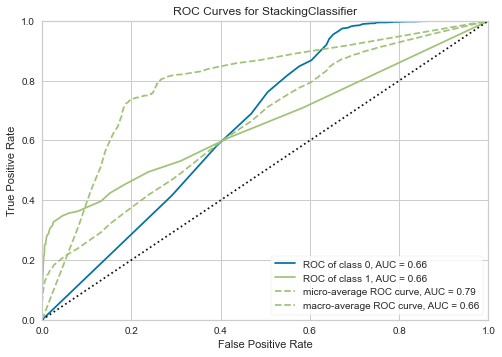

In [47]:
plot_model(stacker)

In [48]:
save_model(stacker,'stack_inicial')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='etiqueta conjunta',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                                                          max_depth=None,
                                                                          max_features='auto',
                                                 

In [ ]:
from pycaret.classification import load_model
saved_1_stack = load_model('stack_inicial')
